## Hubway Visualization

In [80]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

import seaborn as sns
import geoplotlib as gp

from dataset_io import get_stations, get_all_trip_data
from station_geography import lat_lon_to_xy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
## Extract station data
stations = get_stations()

#print(stations.describe())
print(stations.head())
#stations['Station']

# Don't need all these, probably
ids = stations['Station ID'].as_matrix()
lat = stations['lat'].as_matrix()*np.pi/180.0
lon = stations['lon'].as_matrix()*np.pi/180.0
mun = stations['Municipality'].as_matrix()
names = stations['Station'].as_matrix()
n_docks = stations['# of Docks'].as_matrix()

# print(np.unique(ids))

                                             Station Station ID        lat  \
0          359 Broadway - Broadway at Fayette Street     M32026  42.370803   
1                      Agganis Arena - 925 Comm Ave.     A32002  42.351246   
2                   Alewife Station at Russell Field     M32033  42.396105   
3  Allston Green District - Commonwealth Ave & Gr...     A32017  42.348607   
4                                 Ames St at Main St     M32037  42.362500   

         lon Municipality  # of Docks  
0 -71.104412    Cambridge          19  
1 -71.115639       Boston          19  
2 -71.139459    Cambridge          23  
3 -71.134010       Boston          15  
4 -71.088220    Cambridge          19  


In [82]:
## Extract ride data
trips = get_all_trip_data()


/home/mattgiamou/.virtualenvs/cv3/lib/python3.4/site-packages/pandas/core/ops.py:714: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [54]:
print(trips.head(5))
start_station_ids = pd.Series.unique(trips['start station id'])
end_station_ids = pd.Series.unique(trips['end station id'])
print("N start stations: {:}".format(len(start_station_ids)))
print("N end stations: {:}".format(len(end_station_ids)))

# print("Dtypes: {:}".format(trips.dtypes))
# print("Start stations: {:}".format(start_station_ids))
print("End stations: {:}".format(end_station_ids))
# trips.describe()
# print(np.all(np.sort(np.unique(trips['start station id'].as_matrix())) == np.sort(np.unique(trips['end station id'].as_matrix()))))


   tripduration            starttime             stoptime  start station id  \
0           542  2015-01-01 00:21:44  2015-01-01 00:30:47               115   
1           438  2015-01-01 00:27:03  2015-01-01 00:34:21                80   
2           254  2015-01-01 00:31:31  2015-01-01 00:35:46                91   
3           432  2015-01-01 00:53:46  2015-01-01 01:00:58               115   
4           735  2015-01-01 01:07:06  2015-01-01 01:19:21               105   

                                 start station name  start station latitude  \
0                             Porter Square Station               42.387995   
1           MIT Stata Center at Vassar St / Main St               42.361962   
2  One Kendall Square at Hampshire St / Portland St               42.366277   
3                             Porter Square Station               42.387995   
4   Lower Cambridgeport at Magazine St/Riverside Rd               42.356954   

   start station longitude end station id  \
0    

In [75]:
print(pd.Series.unique(trips[trips['end station id'] == 87]['end station name']))
# trips[trips['end station id'] == ]

['Harvard University Housing - 115 Putnam Ave at Peabody Terrace']


In [48]:
# Extract stations: id, lat, lon, name 
trips.columns
stations_unique = trips[['start station id', 'start station name', ]]

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [26]:
## Plot locations with geoplotlib
# gp.voronoi(stations, line_color='b')
gp.delaunay(stations, cmap='BuGn')
gp.dot(stations, color='r')
# gp.graph(stations, color='g')
gp.show()
# Inline broken in Python 3.4: 
# gp.inline()

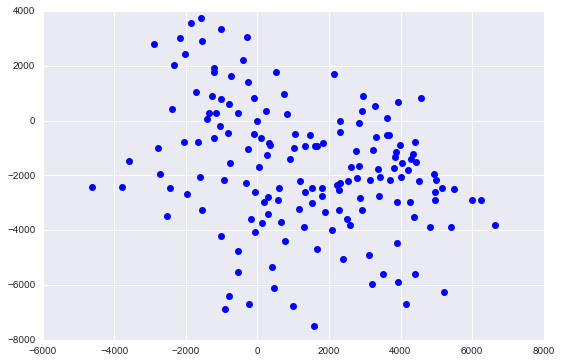

In [5]:
## Plot stations on a map
x, y = lat_lon_to_xy(lat, lon)
plt.figure()
plt.plot(x, y, 'bo')